# PROJET ANALYSE DES VENTES 

 Problématique


Chaque fichier contient les colonnes suivantes:
* OrderID: l'identifiant unique de la commande
* Product: La désignation du produit
* Quantity Ordered: la quantité vendue
* Price each: le prix unitaire
* order date : La date d'achat
* Purchase adress: l'adresse de la boutique de vente

Nous allons analyser ces données pour répondre aux questions suivantes:

* Quel est le meilleur mois de vente ? et Quel est le chiffre d'affaires de ce mois ?
* Dans quelle ville a-t-on le plus vendu de produits ?
* A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?
* Quels sont les produits qui sont souvent achetés ensemble ?
* Quel produit a-t-on le plus vendu et pourquoi ?

Nous allons accompagner nos solutions de visualisations pertinentes afin d'aider le business à améliorer ses chiffres de l'année suivante.



Import des packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('all_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


 Nettoyage

In [6]:
data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
#le pourecentage des valeurs manquantes
missing_value = data.isna().sum()
percent = (missing_value/len(data)*100)
missing_table = pd.DataFrame({'valeurs manquantes': missing_value, 'pourcentage': percent})

In [8]:
missing_table

,valeurs manquantes,pourcentage
Order ID,545,0.291678
Product,545,0.291678
Quantity Ordered,545,0.291678
Price Each,545,0.291678
Order Date,545,0.291678
Purchase Address,545,0.291678


In [9]:
data.dropna(how='all', inplace=True)

In [10]:
data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
data.duplicated().sum()

618

In [12]:
data.drop_duplicates(subset=['Order ID','Product','Quantity Ordered','Price Each','Order Date','Purchase Address'], inplace=True)

In [13]:
data.duplicated().sum()

0

statistique descriptive

Quel est le mois durant lequel nous avons réalisé le plus gros chiffre d'affaire ?

In [14]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [15]:
#nous devons extraire le mois dans un premier temps, alors on va faire une split
def Month(nom_colonne):
    return nom_colonne.split('/')[0]

In [16]:
#rajoutons une colonne de mois 
data['Month'] = data['Order Date'].apply(Month)

In [17]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [18]:
#on constate qu'il ya un élément étrangé
data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [19]:
data = data[data['Month'] != 'Order Date']

In [20]:
data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [21]:
#Convertissons le mois en entier
data['Month'] = data['Month'].astype(int)

In [22]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [23]:
#maintenant nous devons obtenir le chiffre d'affaire, dans la base on dispose de la quantité et du prix unitaire
#alors nous allons multiplier la quantité par le prix unitaire, mais cette opération ne peut se faire sur des colonnes 
#de type object
#le prix sera converti en float et la quantitée en entier

In [25]:
data['Price Each'] = data['Price Each'].astype(float)

In [28]:
data['Quantity Ordered'] = data['Quantity Ordered'].astype(int)

In [29]:
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [31]:
#créons un colonne vente pour obtenir le total des ventes de chaque produit
data['sales'] = data['Price Each'] * data['Quantity Ordered']

In [32]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [33]:
#maintenant on peut identifier le mois avec le meilleure chiffre d'affaire avec un groupby
data.groupby('Month')["sales"].sum().sort_values(ascending=False)

Month
12    4608295.70
10    3734777.86
4     3389217.98
11    3197875.05
5     3150616.23
3     2804973.35
7     2646461.32
6     2576280.15
8     2241083.37
2     2200078.08
9     2094465.69
1     1821413.16
Name: sales, dtype: float64

Text(0.5, 1.0, "chiffre d'affaire par mois")

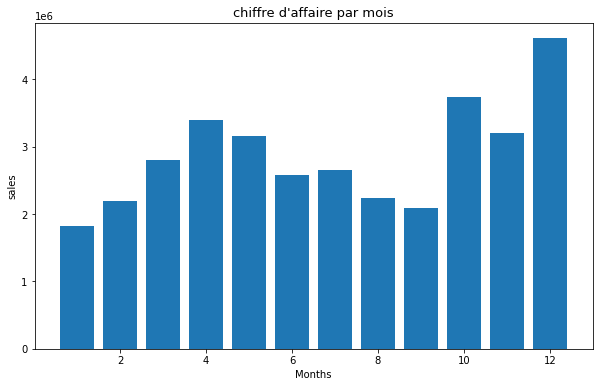

In [37]:
plt.figure(figsize=(10,6))
months = range(1,13)# les 12 premiere valeurs
plt.bar(months,data.groupby('Month')['sales'].sum())
plt.xlabel("Months")
plt.ylabel("sales")
plt.title("chiffre d'affaire par mois", fontsize=13)

Le mois de décembre est le mois où il y eu le plus de vente ce qui peut s'expliquer car c'est un mois de fête

Dans quelle ville a-t-on le plus vendu de produits ?

In [42]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [45]:
#nous devons extraire le mois dans un premier temps, alors on va faire une split
def City(nom_colonne):
    return nom_colonne.split(',')[1]

In [46]:
#rajoutons une colonne de ville
data['city'] = data['Purchase Address'].apply(City)

In [48]:
data['city'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [47]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [50]:
#maintenant on peut identifier les meilleures ville par commande
data.groupby('city')["city"].count().sort_values(ascending=False)

city
 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: city, dtype: int64

In [51]:
data.groupby('city')["city"].count().index

Index([' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles',
       ' New York City', ' Portland', ' San Francisco', ' Seattle'],
      dtype='object', name='city')

In [52]:
data.groupby('city')["city"].count().values

array([14863,  9890, 19901, 14797, 29564, 24847, 12449, 44662, 14713],
      dtype=int64)

Text(0.5, 1.0, "chiffre d'affaire par mois")

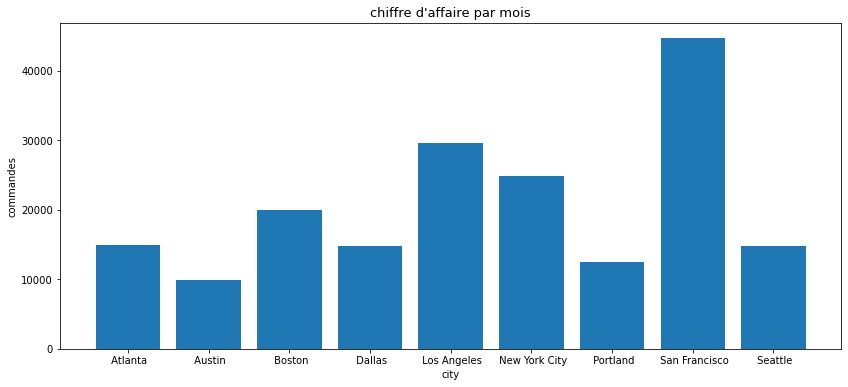

In [55]:
plt.figure(figsize=(14,6))
plt.bar(data.groupby('city')["city"].count().index,data.groupby('city')["city"].count().values)
plt.xlabel("city")
plt.ylabel("commandes")
plt.title("chiffre d'affaire par mois", fontsize=13)

La ville qui vend le plus de produit est San Francisco

A quelle heure devons-nous passer de la publicité pour augmenter nos ventes ?

In [56]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [59]:
#on va cette fois extraire la date avec datetime
data['Hour'] = pd.to_datetime(data['Order Date']).dt.hour

In [60]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [62]:
keys =[]
hours =[]
for key,hour in data.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour))
    
hours

[3902,
 2347,
 1242,
 830,
 852,
 1320,
 2481,
 4002,
 6252,
 8740,
 10929,
 12392,
 12573,
 12115,
 10965,
 10159,
 10359,
 10884,
 12263,
 12886,
 12218,
 10905,
 8808,
 6262]

Text(0, 0.5, 'nombre de commande')

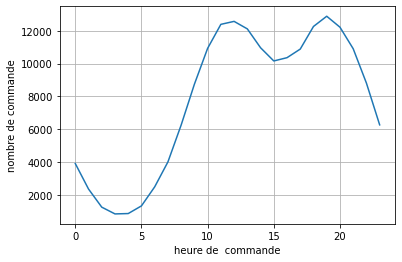

In [65]:
plt.grid()
plt.plot(keys,hours)
plt.xlabel('heure de  commande')
plt.ylabel('nombre de commande')

Le bon moment pour une publicité est entre 12h et 19h

Quel produit a-t-on le plus vendu et pourquoi ?

In [78]:
#on va faire une regroupement des produit par quantité commandée
data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        30986
AA Batteries (4-pack)         27615
USB-C Charging Cable          23931
Lightning Charging Cable      23169
Wired Headphones              20524
Apple Airpods Headphones      15637
Bose SoundSport Headphones    13430
27in FHD Monitor               7541
iPhone                         6847
27in 4K Gaming Monitor         6239
34in Ultrawide Monitor         6192
Google Phone                   5529
Flatscreen TV                  4813
Macbook Pro Laptop             4725
ThinkPad Laptop                4128
20in Monitor                   4126
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int32

<AxesSubplot:xlabel='Product'>

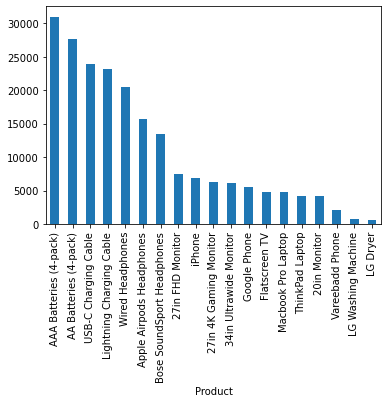

In [77]:
data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).plot(kind='bar')

In [79]:
#on va faire une regroupement des produit par prix pour comprendre l'impact du prix sur les ventes des produits
#on prendra le prix moyen car il peut y avoir des promotions également
data.groupby('Product')['Price Each'].mean().sort_values(ascending=False)

Product
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
iPhone                         700.00
LG Dryer                       600.00
LG Washing Machine             600.00
Google Phone                   600.00
Vareebadd Phone                400.00
27in 4K Gaming Monitor         389.99
34in Ultrawide Monitor         379.99
Flatscreen TV                  300.00
Apple Airpods Headphones       150.00
27in FHD Monitor               149.99
20in Monitor                   109.99
Bose SoundSport Headphones      99.99
Lightning Charging Cable        14.95
Wired Headphones                11.99
USB-C Charging Cable            11.95
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Name: Price Each, dtype: float64

<AxesSubplot:xlabel='Product'>

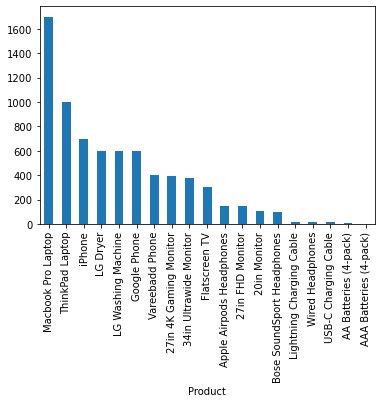

In [75]:
data.groupby('Product')['Price Each'].mean().sort_values(ascending=False).plot(kind='bar')

In [90]:
#fesont un graphique pour combiner 
products = data.groupby('Product')['Quantity Ordered'].sum().index
quantity = data.groupby('Product')['Quantity Ordered'].sum()
prices =data.groupby('Product')['Price Each'].mean()

C:\Users\Lenoovo\AppData\Local\Temp\ipykernel_15672\4189391790.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical', size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 2880x1728 with 0 Axes>

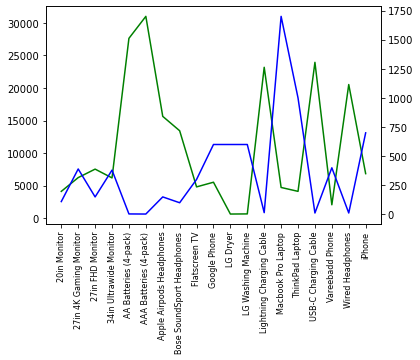

In [91]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.plot(products,quantity,color='g')
ax2.plot(products,prices,'b-')
ax1.set_xticklabels(products,rotation='vertical', size=8)

En vert nous avons les quantités vendues et en bleu le prix moyen, ON constate alors que plus les prix sont haut, et plus les 
quantités vendues sont basses, et inverssement.

les produis les plus vendus sont les: AAA Batteries (4-pack)    


Quels sont les produits qui sont souvent achetés ensemble ?

In [92]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [93]:
#les éleéments qui ont été achetés lors de la même commande ont le meme id donc on va pas les supprimer
data = data[data['Order ID'].duplicated(keep=False)]

In [94]:
#on crée une nouvelle colonne pour prendre les combinaisons qui ont été commandés au meme moment
data['Grouped'] = data.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

C:\Users\Lenoovo\AppData\Local\Temp\ipykernel_15672\3847844415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grouped'] = data.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [95]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"


In [106]:
#on a plus besoins de éléments dupliqués donc on les supprimes, 
data1 = data.drop_duplicates(subset=['Order ID'])
data1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,Apple Airpods Headphones,1,150.00,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle,10,"Apple Airpods Headphones,ThinkPad Laptop"


In [107]:
data1['Grouped'].value_counts()[:5]

iPhone,Lightning Charging Cable         886
Google Phone,USB-C Charging Cable       857
iPhone,Wired Headphones                 361
Vareebadd Phone,USB-C Charging Cable    312
Google Phone,Wired Headphones           303
Name: Grouped, dtype: int64

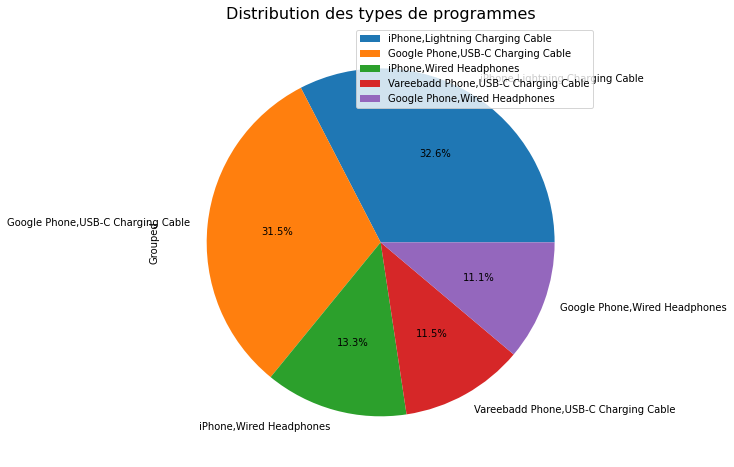

In [118]:
data1['Grouped'].value_counts()[:5].plot.pie(autopct = '%1.1f%%', shadow = False,figsize=(8,8))
plt.title('Distribution des types de programmes', fontsize = 16)
plt.legend()